# Maximum Likelihood Logistic Regression

Logistic regression is similar to linear regression except that logistic regression is more generalized that it can produce both continuous and categorical outputs. With linear regression, we fit a line using least squares method. With logistic regression, we fit the sigmoid curve using maximum likelihood.

## Maximum Likelihood

The goal of maximum likelihood is to find the optimal way to fit a distribution to the data. The type of distribution we try to fit is the hyperparameter we choose.

Suppose we choose a normal distribution $\mathbb{N}(\text{person's height}; \mu, \sigma)$ to describe the heights of a population, we have an estimated probability (or likelihood) distribution of observing samples as a function of height. We make adjustment to this normal distribution until it maximizes the likelihood of the model given the height data of a population.

Denote $h$ as height. This is the normal distribution describing the probability of finding a person with height $h$. 

$$
P(h;\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(h - \mu)^2}{2\sigma^2}\right)
$$

We can define likelihood as the product of probability for each observation. The likelihood is maximized when model accurately matches observation.
$$
L(\mu, \sigma; \vec{h}) = \prod_{i=1}^{N} P(h_i; \mu, \sigma)
$$

## Connection to Least Squares

If we have a simple linear regression model $\vec{y} = X\vec{w} + \epsilon$, where $\epsilon$ represents some independent normal random measurement noise or error. The likelihood function is the product of probability for each model discrepancy with observation. We want to **minimize the errors** by assuming errors are normally distributed with 0 mean and a standard deviation.

$$
L = \prod_{i=1}^N \mathbb{N}(y_i - X_i \vec{w}; 0, \sigma)
$$

If we take a log of this likelihood, i.e. log likelihood, we get

$$
\log(L) = -\frac{N}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^N(y_i - X_i \vec{w})^2
$$

When we maximize the log-likelihood, we are minimizing the sum of squared errors. Therefore, under the assumption of normally distributed errors, least squares and maximum likelihood estimator give the same estimates for the regression coefficients.

| Feature     | Maximum Likelihood | Least Squares |
|-------------|--------------------|---------------|
| Approach    | Bayesian           | Frequentist   |
| Assumptions | Data is generated by a random process with a known probability distribution. | Data is generated by a linear model with additive noise.|
| Estimator   | Maximizes the likelihood function. | Minimizes the sum of the squared errors |
| Robustness  | More robust to non-normality | Less robust to non-normality |
| Compute     | More expensive | Less expensive |

It's important to clarify the difference between likelihood and probability in the context of machine learning.

- Probability pertains to the uncertainty before an event occurs, e.g. `P(head) = 0.50`
- Likelihood measures the plausibility of a model or hypothesis given the observed data.

## Logistic Regression

Logistic regression is a specific type of generalized linear model. "Logistic" is named after the logit function. A logit function maps probabilities to a full range of real numbers. On other hand, a sigmoid function is the inverse of the logit function, which maps real numbers to probabilities.

The **odds** of an event is defined by the probability of the event occuring divided by the probability of the event _not_ occurring.

$$
\text{log-odds} = \text{logit}(p) = \log\left(\frac{p}{1 - p}\right)
$$


If we apply a sigmoid function to the logits, we get back $p$.

$$
\begin{aligned}
\text{sigmoid}(\text{logit}(p))
&= \frac{1}{1 + \exp(-\log\left(\frac{p}{1 - p}\right))} \\
&= \frac{1}{1 + \exp(\log\left(\frac{1 - p}{p}\right))} \\
&= \frac{1}{1 + \left(\frac{1 - p}{p}\right)} \\
&= \frac{1}{\frac{p + 1 - p}{p}} \\
&= p
\end{aligned}
$$

Our _linear model_ aims to model the logits which are real numbers range from negative infinity to positive infinity.

$$
\text{logit}(p) = \log\left(\frac{p}{1 - p}\right) = X\vec{w} + b
$$

X (1000, 2)
w (2, 1)
b (1,)
y (1000, 1)
Logits (1000, 1)


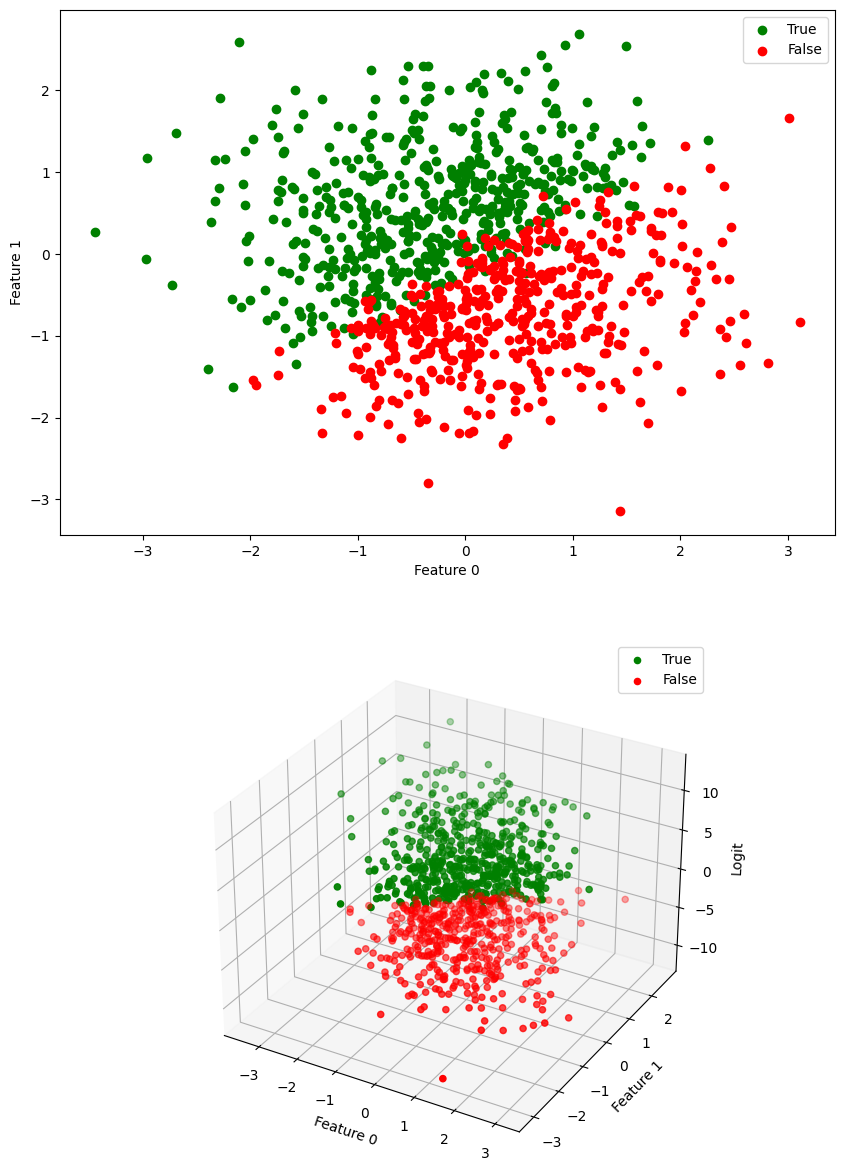

In [42]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000 # Number of samples
D = 2 # Dimension of feature vector

# Randomly generate the data
X = np.random.randn(N, D)

# Create a model with a true weight and bias
true_w = np.array([[-2], [3]])
true_b = np.array([0.5])

# Generate logits with some random noise
logits = X @ true_w + true_b + np.random.randn(N, 1) * 0.5
# Apply sigmoid function and threshold at 0.5
y = 1 / (1 + np.exp(-logits)) > 0.5

print("X", X.shape)
print("w", true_w.shape)
print("b", true_b.shape)
print("y", y.shape)
print("Logits", logits.shape)


fig = plt.figure(figsize=(10, 15))

ax = fig.add_subplot(2, 1, 1)
true_mask = y[:, 0] == True
false_mask = y[:, 0] == False
ax.scatter(X[true_mask, 0], X[true_mask, 1], color="green", label="True")
ax.scatter(X[false_mask, 0], X[false_mask, 1], color="red", label="False")
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.scatter3D(X[true_mask, 0], X[true_mask, 1], logits[true_mask, 0], color="green", label="True")
ax.scatter3D(X[false_mask, 0], X[false_mask, 1], logits[false_mask, 0], color="red", label="False")
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Logit")
ax.legend()

Let $\hat{p}$ be the predicted probability from our model.

$$
\sigma(z) = \frac{1}{1 + \exp(-z)} = \hat{p}
$$

Define the loss to be binary cross entropy.

$$
L = \frac{1}{N}\sum p \log(\hat{p}) + (1 - p) \log(1 - \hat{p})
$$

The gradient of loss with with respect to predicted probability

$$
\frac{\partial L}{\partial \hat{p}} = \left( \frac{-p}{\hat{p}} + \frac{1 - p}{1 - \hat{p}} \right)
$$

The gradient of predicted probability with respect to $z$ is basically the derivative of sigmoid function.

$$
\frac{\partial \hat{p}}{\partial z} = \hat{p}(1 - \hat{p})
$$

Thus, the gradient of loss with respect to $z$ is

$$
\frac{\partial L}{\partial z} = \frac{\partial L}{\partial \hat{p}}\frac{\partial \hat{p}}{\partial z} = \hat{p} - p
$$

The gradient of $z$ with respect to $\vec{w}$ is $X^\intercal$ and the gradient of $z$ with respect to $\vec{b}$ is just 1.

$$
\frac{\partial z}{\partial \vec{w}} = X^\intercal
$$

$$
\frac{\partial z}{\partial b} = 1
$$

Predicted w [-1.65088081  2.64366033]
True w [-2  3]
Predicted b [0.00126954]
True b [0.5]


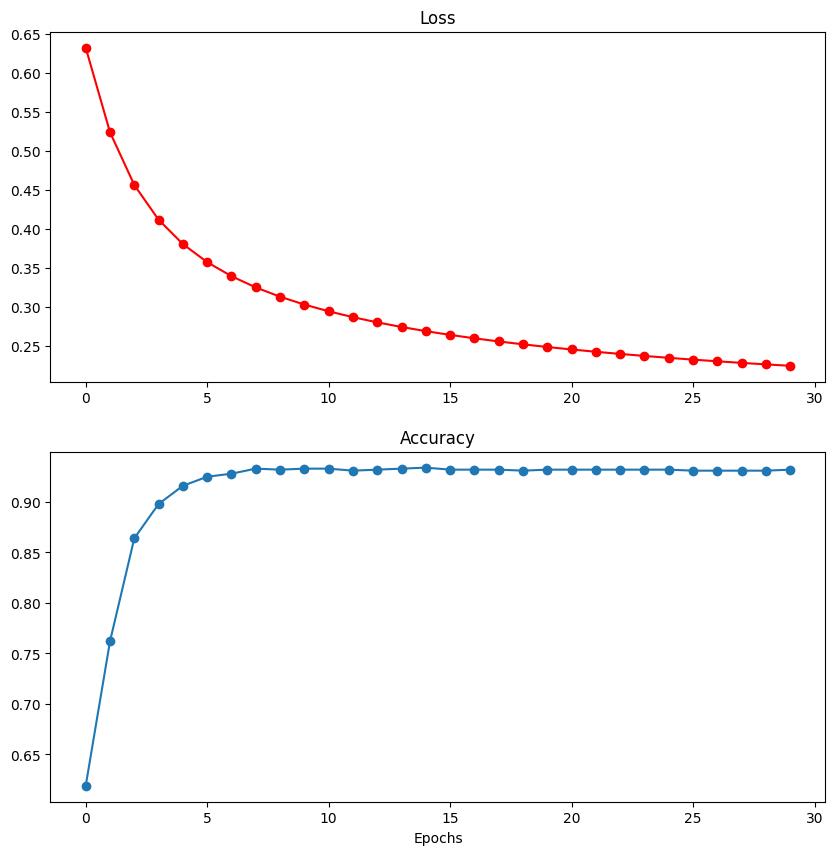

In [95]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(p_true, p_pred):
    return -np.mean(p_true * np.log(p_pred) + (1 - p_true) * np.log(1 - p_pred))

def logistic_regression(X, y, epochs=30, learning_rate=0.001):
    # Let N be number of samples, D be dimension of features
    N, D = X.shape
    w = np.random.randn(D, 1)
    b = np.zeros(1)
    
    accuracy = []
    losses = []
    
    for ep in range(epochs):
        z = X @ w + b
        p_pred = sigmoid(z)
        
        grad_w = X.T @ (p_pred - y)
        grad_b = np.mean(p_pred - y) # b is a real number, not a vector, need to average all the contributions.
        
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
        
        z = X @ w + b
        p_pred = sigmoid(z)
        losses.append(binary_cross_entropy(y, p_pred))
        p_pred[p_pred >= 0.50] = 1
        p_pred[p_pred < 0.50] = 0
        accuracy.append(np.mean(y == p_pred))

    return losses, accuracy, w, b

np.random.seed(1337)
losses, accuracy, w, b = logistic_regression(X, y)
_, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot(losses, 'o-', color='red')
axs[0].set_title("Loss")
axs[1].plot(accuracy, 'o-')
axs[1].set_title("Accuracy")
axs[1].set_xlabel("Epochs")
print("Predicted w", w.flatten())
print("True w", true_w.flatten())
print("Predicted b", b)
print("True b", true_b)